# Multiclass Classification with a neural network

In [12]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [13]:
from pyldl.activations import Sigmoid
from pyldl.encapsulations import Sequential
from pyldl.losses import CrossEntropyLoss
from pyldl.modules import Linear
from pyldl.optimizers import SGD
from pyldl.utils import encode_one_hot, contingency_matrix

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

## Dataset and Network

In [15]:
np.random.seed(0)

In [19]:
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(y_train.shape)

y_train_one_hot = encode_one_hot(y_train)
y_test_one_hot = encode_one_hot(y_test)

print(y_train_one_hot.shape)

(1437,)
(1437, 10)


In [6]:
network = Sequential(Linear(X_train.shape[1], 128), Sigmoid(), Linear(128, 64), Sigmoid(), Linear(64, y_train_one_hot.shape[1]))
loss = CrossEntropyLoss()

## Model performances

In [7]:
losses = SGD(network, loss, X_train, y_train_one_hot, batch_size=64, gradient_step=1e-3, n_iter=1000)

100%|██████████| 1000/1000 [00:14<00:00, 68.49it/s]


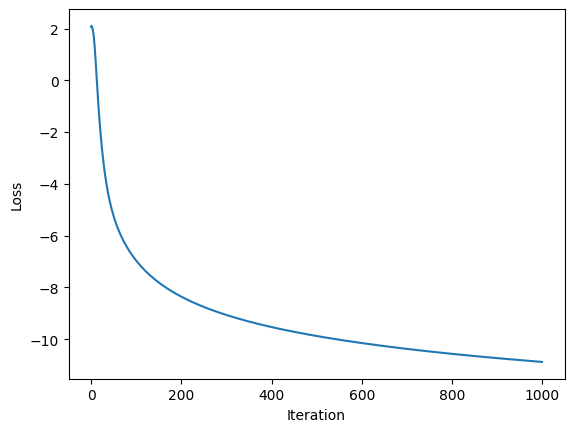

In [8]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [9]:
def predict(X):
    return network(X).argmax(axis=1)

def accuracy(y, yhat):
    return (y == yhat).mean()

yhat = predict(X_test)
print(f"Accuracy: {accuracy(y_test, yhat)*100:.2f}%")

Accuracy: 97.22%


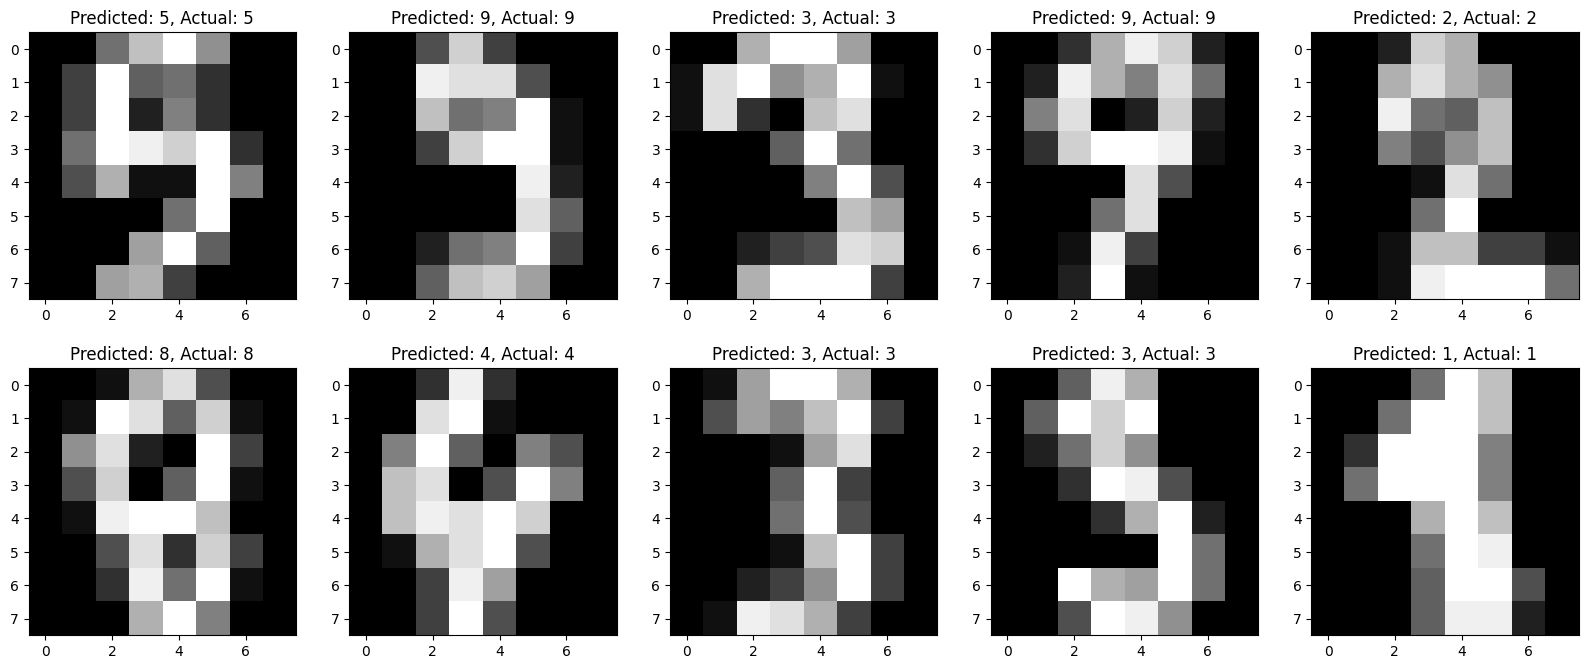

In [10]:
n_images = 10

random_indexes = np.random.choice(range(len(y_test)), n_images, replace=False)
images = X_test[random_indexes]
true_labels = y_test[random_indexes]
predicted_labels = yhat[random_indexes]

plt.subplots(2, 5, figsize=(20, 8))
for i in range(n_images):
    plt.subplot(2, 5, i+1)
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.imshow(images[i].reshape(8,8), cmap='gray')

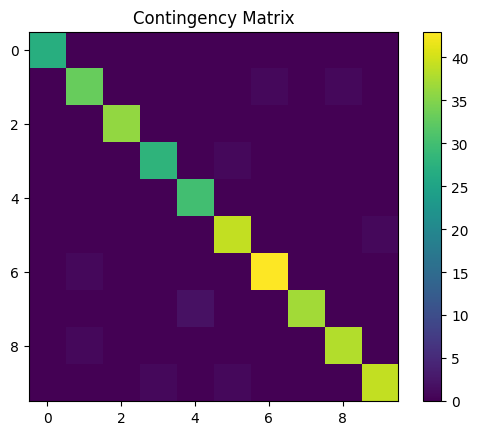

In [11]:
m = contingency_matrix(y_test, yhat)

fig = plt.figure()
mat_plot = plt.imshow(m)
plt.title("Contingency Matrix")
plt.colorbar(mat_plot)

plt.show()